In [33]:
import numpy as np
import matplotlib.pyplot as plt
from method import gaussian_domain, step_domain

In [34]:
def dfdx(domain, dx):
    return 1/(dx**2) * (- 2 * domain + np.roll(domain, 1) + np.roll(domain, -1))

def dfdt(domain, dx, D):
    return D * dfdx(domain, dx)

def euler_step(domain, dx, dt, D):
    return domain + dfdt(domain, dx, D) * dt

def rk2_step(domain, dx, dt, D):
    k1 = dfdt(domain, dx, D)
    k2 = dfdt(domain + k1 * dt, dx, D)
    return domain + 0.5 * (k1 + k2) * dt

Saved figure: output/exercise2/gaussian_diffusion.png


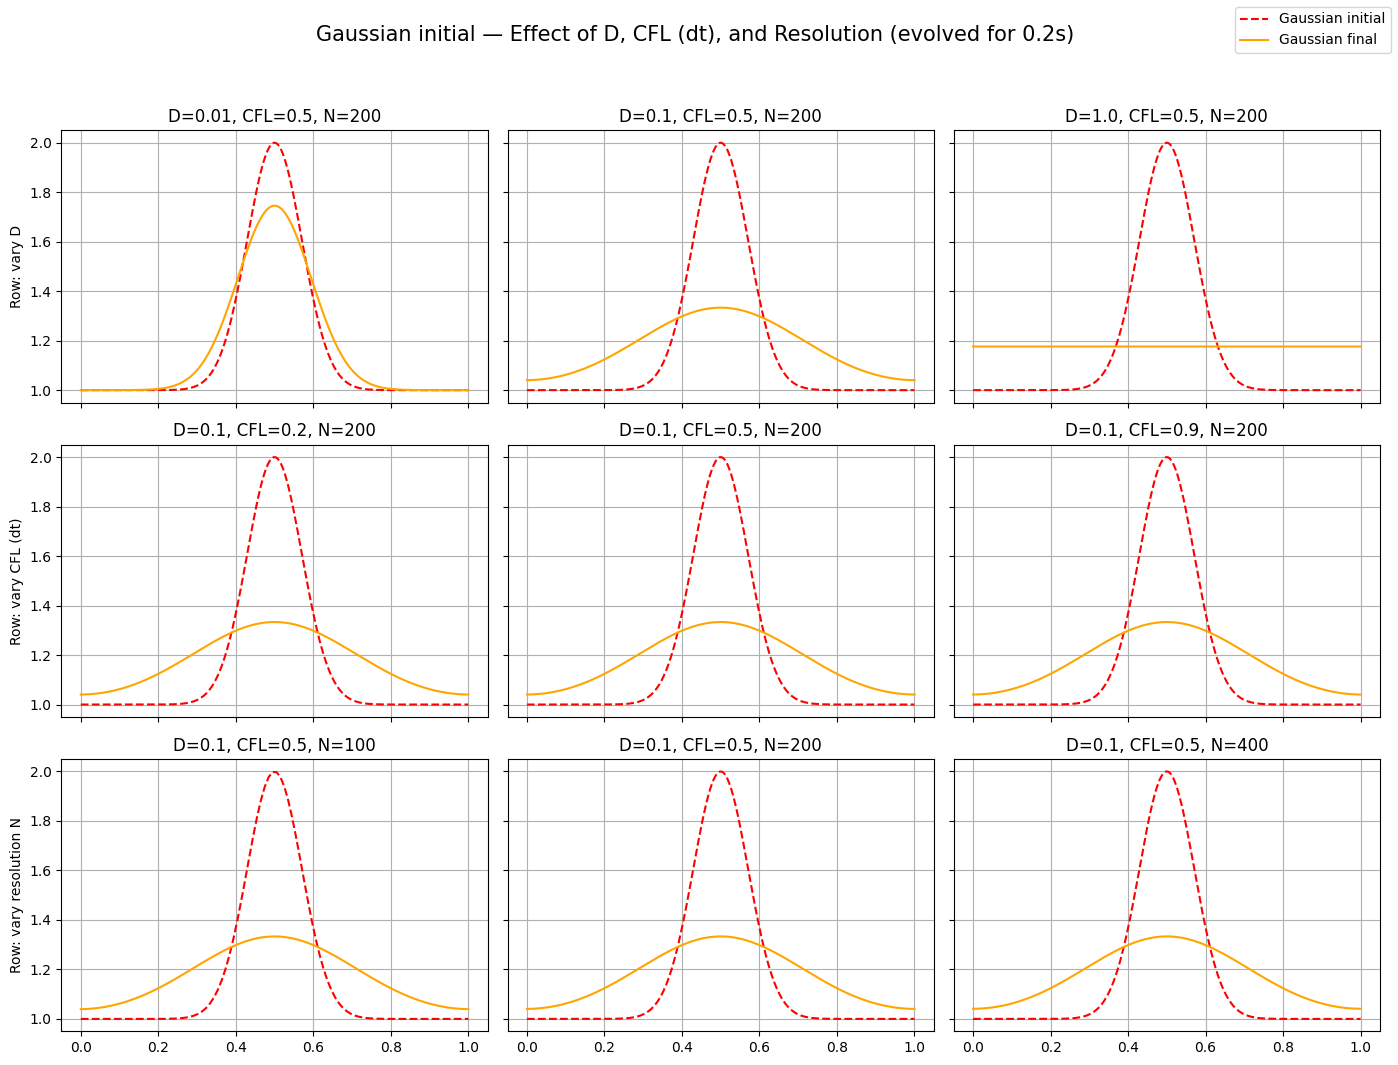

Saved figure: output/exercise2/step_diffusion.png


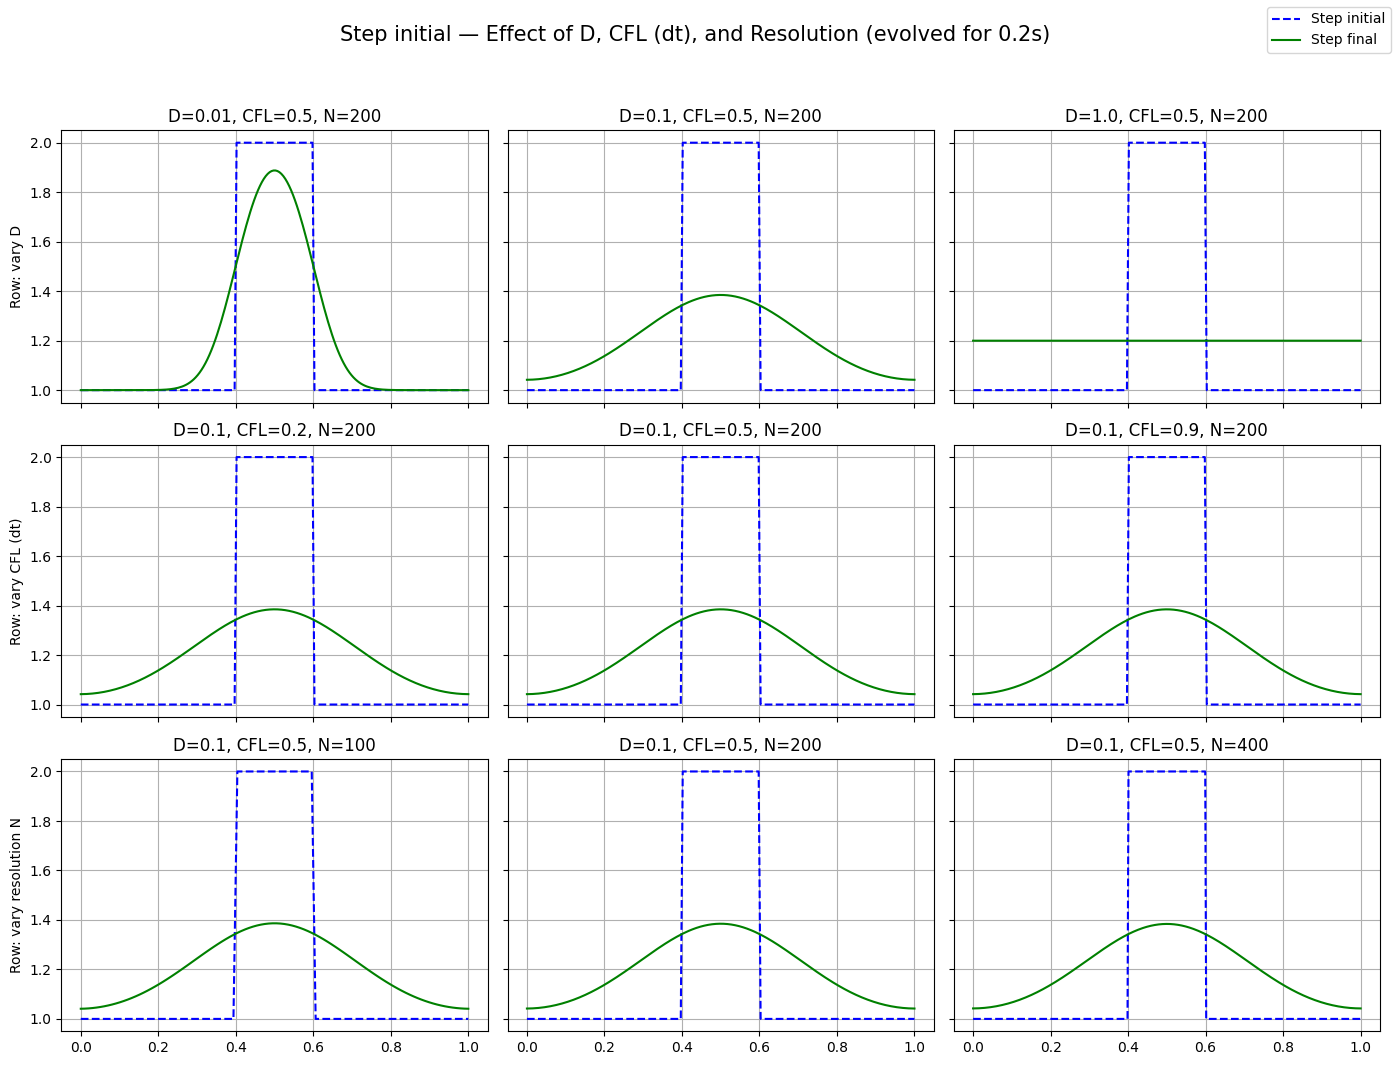

In [35]:
# Compare how D, time step (via CFL), and resolution affect diffusion for two initial conditions
# Restore: produce two separate 3x3 figures (one per initial condition) for readability
# Colour scheme: Gaussian (final=orange, initial=red), Step (final=green, initial=blue)

import os

D_vals = [0.01, 0.1, 1.0]
CFL_vals = [0.2, 0.5, 0.9]
N_vals = [100, 200, 400]
# reduced total simulation time so final profiles remain informative
total_time = 0.2

init_funcs = [(gaussian_domain, 'Gaussian'), (step_domain, 'Step')]

# Colour mapping: final / initial
color_map = {
    'Step': {'final': 'green', 'initial': 'blue'},
    'Gaussian': {'final': 'orange', 'initial': 'red'}
}

outdir = os.path.join('output', 'exercise2')
os.makedirs(outdir, exist_ok=True)


def run_sim(N, D, CFL, init_func, total_time=total_time, method='rk2'):
    x, domain0 = init_func(N)
    dx = x[1] - x[0]
    domain = domain0.astype(float).copy()
    # time step from the usual stability requirement for diffusion
    dt = dx**2 / (2 * D) * CFL
    # ensure we cover at least total_time (use ceil)
    num_steps = int(max(1, np.ceil(total_time / dt)))
    for _ in range(num_steps):
        domain = rk2_step(domain, dx, dt, D)
    return x, domain0, domain

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

# Create one 3x3 figure per initial condition for clarity
for init_func, name in init_funcs:
    fig, axes = plt.subplots(3, 3, figsize=(14, 11), sharex=True, sharey=True)
    fig.suptitle(f'{name} initial — Effect of D, CFL (dt), and Resolution (evolved for {total_time}s)', fontsize=15)

    # Row 0: vary D
    baseline_N = 200
    baseline_CFL = 0.5
    for j, D in enumerate(D_vals):
        ax = axes[0, j]
        x, dom0, domf = run_sim(baseline_N, D, baseline_CFL, init_func)
        ax.plot(x, dom0, '--', color=color_map[name]['initial'], label=f'{name} initial')
        ax.plot(x, domf, '-', color=color_map[name]['final'], label=f'{name} final')
        ax.set_title(f'D={D}, CFL={baseline_CFL}, N={baseline_N}')
        if j == 0:
            ax.set_ylabel('Row: vary D')

    # Row 1: vary CFL
    baseline_N = 200
    baseline_D = 0.1
    for j, CFL in enumerate(CFL_vals):
        ax = axes[1, j]
        x, dom0, domf = run_sim(baseline_N, baseline_D, CFL, init_func)
        ax.plot(x, dom0, '--', color=color_map[name]['initial'], label=f'{name} initial')
        ax.plot(x, domf, '-', color=color_map[name]['final'], label=f'{name} final')
        ax.set_title(f'D={baseline_D}, CFL={CFL}, N={baseline_N}')
        if j == 0:
            ax.set_ylabel('Row: vary CFL (dt)')

    # Row 2: vary N (resolution)
    baseline_D = 0.1
    baseline_CFL = 0.5
    for j, N in enumerate(N_vals):
        ax = axes[2, j]
        x, dom0, domf = run_sim(N, baseline_D, baseline_CFL, init_func)
        ax.plot(x, dom0, '--', color=color_map[name]['initial'], label=f'{name} initial')
        ax.plot(x, domf, '-', color=color_map[name]['final'], label=f'{name} final')
        ax.set_title(f'D={baseline_D}, CFL={baseline_CFL}, N={N}')
        if j == 0:
            ax.set_ylabel('Row: vary resolution N')

    # Legend from the first subplot (initial & final for this initial condition)
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save figure to output directory
    fname = os.path.join(outdir, f"{name.lower()}_diffusion.png")
    fig.savefig(fname, dpi=200)
    print(f"Saved figure: {fname}")

    plt.show()

# End of experiment cell

In [ ]:
# and now we would like to compare diffusion to the advection equation
